> Following example taken from Ali Taylan Cemgil's talk on byoyo2018


# Line Fitting

* Input - output pairs
$$
(x_i, y_i)
$$
$i=1\dots N$ 

* Model
$$
\hat y_i = f(x; w_1, w_0) = w_0 + w_1 x 
$$


>  $x$ : input 

>  $w_1$: weight 1 (slope)

>  $w_0$: weight 1 (bias)

$f_i \equiv f(x_i; w_1, w_0)$


Learning from experience (data $(x_i, y_i)$),

> We want to find optimum parameters $w_1, w_0$ that minimize the loss function 

and loss function is the difference between actual target value $y_i$ and the predicted value $\hat y_i$.

## Loss Function
$$
J(w) = \frac{1}{2N}\sum^N_i (\hat y_i - y_i)^2 = \frac{1}{2N}\sum^N_i ( w_0 + w_1 x - y_i)^2
$$

Text(0, 0.5, 'y (output : ex-price of the house)')

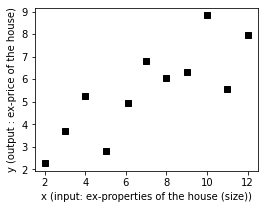

In [ ]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import matplotlib.pylab as plt
from IPython.display import clear_output, display, HTML

x = np.array([8.0 , 6.1 , 11.,  7.,   9.,   12. , 4.,   2.,   10,    5,    3])
y = np.array([6.04, 4.95, 5.58, 6.81, 6.33, 7.96, 5.24, 2.26, 8.84, 2.82, 3.68])

plt.figure(figsize=(4,3))
plt.plot(x,y,'sk')
plt.xlabel('x (input: ex-properties of the house (size))')
plt.ylabel('y (output : ex-price of the house)')

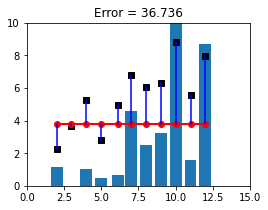

In [ ]:
def plot_fit(w1, w0):
    f = w0 + w1*x

    plt.figure(figsize=(4,3))
    plt.plot(x,y,'sk')
    plt.plot(x,f,'o-r')
    #plt.axis('equal')
    plt.xlim((0,15))
    plt.ylim((0,10))
    for i in range(len(x)):
        plt.plot((x[i],x[i]),(f[i],y[i]),'b')
#    plt.show()
#    plt.figure(figsize=(4,1))
    plt.bar(x,(f-y)**2/2)
    plt.title('Error = '+str(np.sum((f-y)**2/2)))
    plt.ylim((0,10))
    plt.xlim((0,15))
    plt.show()
    
plot_fit(0.0,3.79)

In [ ]:
interact(plot_fit, w1=(-2, 2, 0.01), w0=(-5, 5, 0.01));

interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0, step=0.01), FloatSlider(valu…

# Gradient Descent


Randomly initialize w

Loop 
 - update: $w = w - \alpha \frac{dJ}{dw}$


Function to be minimized
$$
f(w) = (w-3)^2 + 5
$$

Derivative
$$
\frac{df(w)}{dw} = 2(w-3)\frac{d(w-3)}{dw} + 0 = 2(w-3)(\frac{d(w)}{dw}- \frac{d3}{dw}) = 2(w-3) (1 - 0) = 2(w-3)
$$


In [ ]:
def f(w): 
  return (w-3) * (w-3) + 5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
w = np.linspace(-10,16,100)

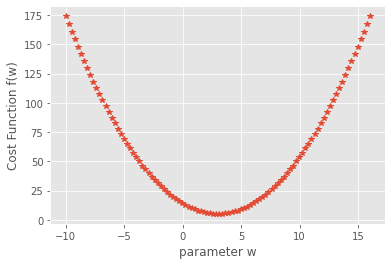

In [ ]:
plt.plot(w,f(w),"*")
plt.xlabel("parameter w")
plt.ylabel("Cost Function f(w)")
plt.show()

In [ ]:
def derivative(w):
  return 2 * (w - 3)

# Gradient Descent


Randomly initialize w

Loop 
 - update: $w = w - \alpha \frac{dJ}{dw}$

In [ ]:
# Randomly initialize w
w0 = np.random.randn()
w0

1.1231058417413582

In [ ]:
alpha = 0.00001
for i in range(100000):
  w0 = w0 - alpha *  derivative(w0)
w0

2.999999999999999

# Gradient Descent with multiple parameters

Cost Function:
 - $ f(w0,w1,w2) = (w0 - 1)^2 + (w1 - 3)^2 +(w2 - 5)^2 $
 
 
Derivatives
 - $ \frac{df}{dw0} = 2 (w0 - 1)$
 - $ \frac{df}{dw1} = 2 (w1 - 3)$
 - $ \frac{df}{dw2} = 2 (w2 - 5)$
 
Summary
 - $ \frac{df}{dw} = 2 [(w0 - 1), (w1 - 3), (w2 - 5)].T $
 

In [ ]:
def cost(w0, w1, w2):
    return ((w0-1)**2)+((w1-3)**2)+((w2-5)**2)

def derivative(w0, w1, w2):
    return 2*(w0-1), 2 * (w2 2 * (w1-3),-5)

def gradient_descent(alpha = 0.05, number_steps = 10):
    """
    w : initial value of parameter w
    alpha : step size
    """
    w0, w1, w2 = np.random.randn(3)
    for i in range(number_steps):
      dw0, dw1, dw2 = derivative(w0, w1, w2)
      w0 = w0 - alpha * dw0
      w1 = w1 - alpha * dw1
      w2 = w2 - alpha * dw2

    return w0, w1, w2

In [ ]:
gradient_descent(alpha = 0.05, number_steps = 100)

(1.0000097414844904, 2.9998711859847074, 4.99980989471061)

# Gradient Checking

$f(x) = 3x^2 + 5$

Fitting Line
$y = mx + n \Rightarrow f(x_0) = \frac{\partial f(x)}{\partial x} x_0 + n $

Gradient Checking at point $x_0$

$f(x) = \frac{\partial f(x)}{\partial x} x + (f(x_0) - \frac{\partial f(x)}{\partial x} x_0)$

In [ ]:
def f(x): 
  return 3*x*x + 5

def turev(f, x, e = 0.00001):
  return (f(x + e) - f(x))/e

In [ ]:
def ciz(f,x):
  xs = np.linspace(-4,4)
  plt.plot(xs, f(xs))
  plt.plot(x, f(x), 'x')

  t = np.linspace(x-1,x + 1)
  plt.plot(t, turev(f,x) * t + (f(x) - turev(f,x) * x))
  plt.title('{} Noktasinda Turev: {:.2f}'.format(x,turev(f,x)))

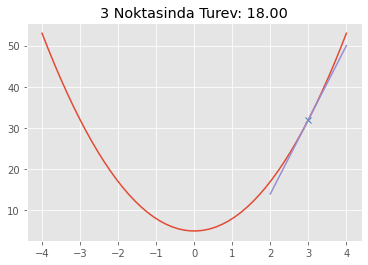

In [ ]:
ciz(f,x = 3)

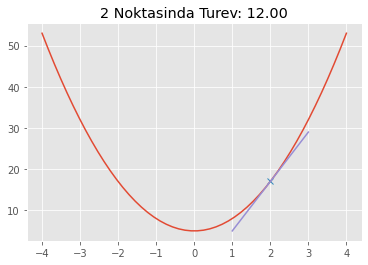

In [ ]:
ciz(f,x = 2)

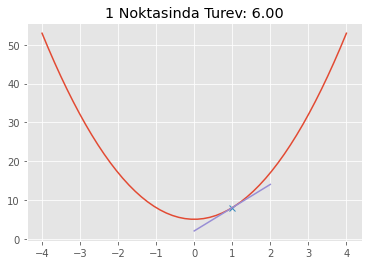

In [ ]:
ciz(f,x = 1)

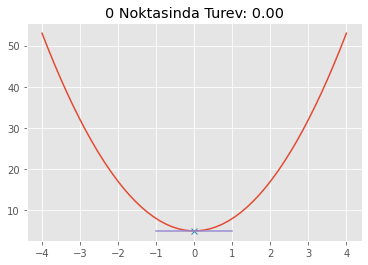

In [ ]:
ciz(f,x = 0)

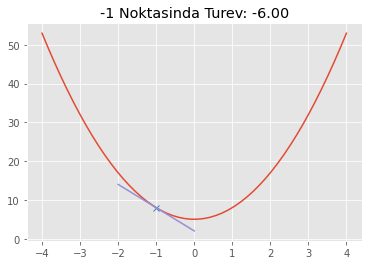

In [ ]:
ciz(f,x = -1)

# Introduction to PyTorch

https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e

In [ ]:
# Introduction to PyTorch

import torch

In [ ]:
# initializing two tensors
a = torch.tensor(2)
b = torch.tensor(11)

print(a,b)
# addition
print(a+b)
# subtraction
print(b-a)
# multiplication
print(a*b)
# division
print(b.floor_divide (a))
print(b.true_divide (a))

tensor(2) tensor(11)
tensor(13)
tensor(9)
tensor(22)
tensor(5)
tensor(5.5000)


In [ ]:
# matrix of zeros
a = torch.zeros((2,5))
print(a)
print(a.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
torch.Size([2, 5])


In [ ]:
# setting the random seed for pytorch
torch.manual_seed(42) # reproducibility : to repoduce the same results we need to use same random generator seed
# matrix of random numbers
a = torch.randn(3,3)
a

tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617]])

In [ ]:
# setting the random seed for pytorch and initializing two tensors
torch.manual_seed(42)
a = torch.randn(3,3)
b = torch.randn(3,3)

c = a.add(b)
c

tensor([[ 0.6040,  0.6637,  1.0438],
        [ 1.3406, -2.8127, -1.1753],
        [ 3.1662,  0.6841,  1.2788]])

In [ ]:
c.reshape([9,1])

tensor([[ 0.6040],
        [ 0.6637],
        [ 1.0438],
        [ 1.3406],
        [-2.8127],
        [-1.1753],
        [ 3.1662],
        [ 0.6841],
        [ 1.2788]])

In [ ]:
def f(w): 
  return (w-3) * (w-3) + 5

In [ ]:
w = torch.randn(1, requires_grad=True)
print(w)

tensor([-0.7658], requires_grad=True)


In [ ]:
y = f(w)
print(y)

tensor([19.1815], grad_fn=<AddBackward0>)


`w.grad` is $\frac{df(w)}{dw}$

In [ ]:
# back propagating
y.backward()

# computing gradients
# Automatic calculation of derivative df(w)/dw
print(w.grad) # 

tensor([-7.5317])


In [ ]:
# manual calculation of derivative df(w)/dw
2 * (w-3)

tensor([-7.5317], grad_fn=<MulBackward0>)

In [ ]:
w = torch.randn(1, requires_grad=True)

alpha = 0.1
for i in range(1000):
  # forward: use new weight to calculate y
  y = f(w)
  # backward: calculate derivative dy/dw
  y.backward()
  
  # gradient descent, don't track
  # torch.no_grad() make all the operations in the block have no gradients.
  with torch.no_grad():
    w = w - alpha *  w.grad
  w.requires_grad = True
w

tensor([3.0000], requires_grad=True)

# Another Example

Function to be minimized wrt w
$$
f(w) = (w - 7)^2 + 9
$$

Derivative 

$$
\frac{df(w)}{dw} = 2(w-7)
$$

In [ ]:
def f(w):
  return (w -7)*(w -7) + 9

Text(0, 0.5, 'f(w)')

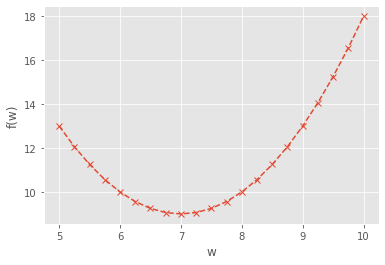

In [ ]:
w = np.linspace(5, 10, 21)
y = [f(wi) for wi in w]
plt.plot(w,y, '--x')
plt.xlabel('w')
plt.ylabel('f(w)')


## Gradient Descent  
Randomly initialize w 
Loop  
  - update: $w = w - \alpha \frac{dJ}{dw}$



In [ ]:
w = torch.randn(1, requires_grad=True)

alpha = 0.1
for i in range(1000):
  # forward: use new weight to calculate y
  y = f(w)
  # backward: calculate derivative dy/dw
  y.backward()
  
  # gradient descent, don't track
  # torch.no_grad() make all the operations in the block have no gradients.
  with torch.no_grad():
    w = w - alpha *  w.grad
  w.requires_grad = True
w

tensor([7.0000], requires_grad=True)

In [ ]:
print(f'function f(w) takes its minimum value at w = {w}')
print(f'function f(w)\'s min value is {f(w)}')

function f(w) takes its minimum value at w = tensor([7.0000], requires_grad=True)
function f(w)'s min value is tensor([9.], grad_fn=<AddBackward0>)


## Optimizer

In [ ]:
import torch.optim as optim

w = torch.randn(1, requires_grad=True)
alpha = 0.1

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([w], lr=alpha)

for i in range(1000):
  # forward: use new weight to calculate y
  y = f(w)
  # backward: calculate derivative dy/dw
  y.backward()
  # No more manual update!
  optimizer.step()
  # Do not accumulate gradients
  optimizer.zero_grad()
w

tensor([7.0000], requires_grad=True)